In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
iris = pd.read_csv("./data/archive/Iris.csv")

In [38]:
iris.head(2)#看看数据是否被读出来了

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [39]:
iris.info()#看看数据情况，先进行数据清洗

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
iris.drop("Id",axis=1,inplace=True)

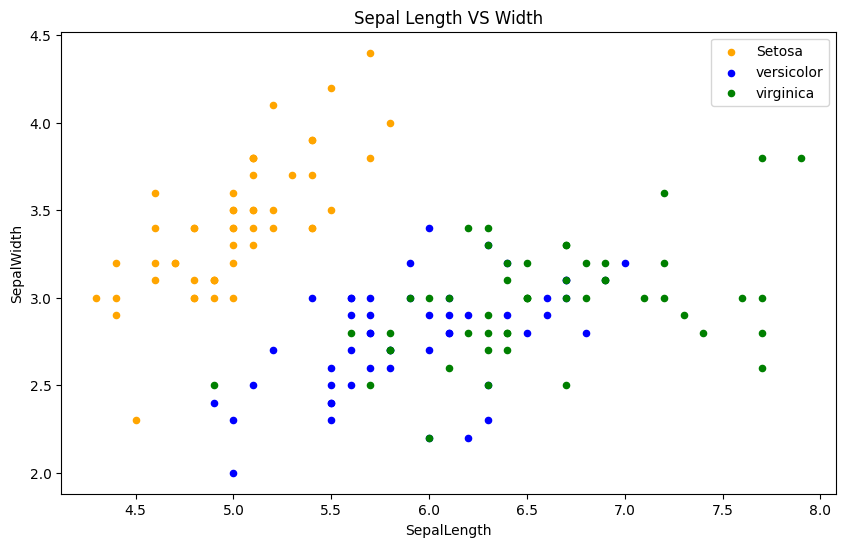

In [41]:
#先绘制出来，查看整体的数据情况，先做一个初步的判断
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', 
                                               x='SepalLengthCm', 
                                               y='SepalWidthCm',
                                               color = 'orange',
                                               label = 'Setosa'
                                              )
iris[iris.Species=='Iris-versicolor'].plot(kind = 'scatter',
                                         x='SepalLengthCm',
                                         y='SepalWidthCm',
                                         color='blue',
                                         label='versicolor',
                                         ax = fig
                                        )
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',
                                          x='SepalLengthCm',
                                          y='SepalWidthCm',
                                          color='green',
                                          label='virginica',
                                          ax=fig
                                         )
fig.set_xlabel('SepalLength')
fig.set_ylabel('SepalWidth')
fig.set_title('Sepal Length VS Width')
fig = plt.gcf()
fig.set_size_inches(10,6)


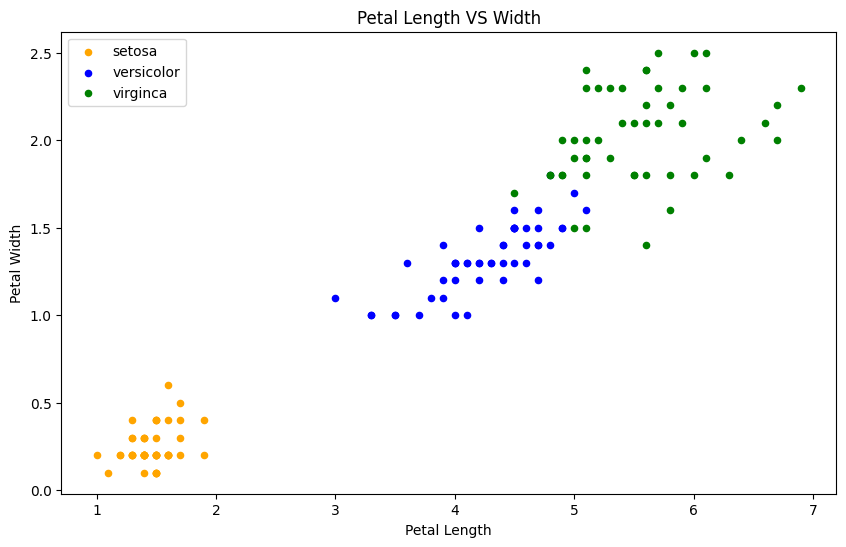

In [42]:
#同上，先做一个初步的判断
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',
                                               x='PetalLengthCm',
                                               y='PetalWidthCm',
                                               color='orange',
                                               label='setosa'
                                              )
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',
                                           x='PetalLengthCm',
                                           y='PetalWidthCm',
                                           color='blue',
                                           label='versicolor',
                                           ax=fig
                                          )
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',
                                         x='PetalLengthCm',
                                         y='PetalWidthCm',
                                         color='green',
                                         label='virginca',
                                         ax=fig
                                        )
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig = plt.gcf()#获取画布对象
fig.set_size_inches(10,6)#设置画布大小

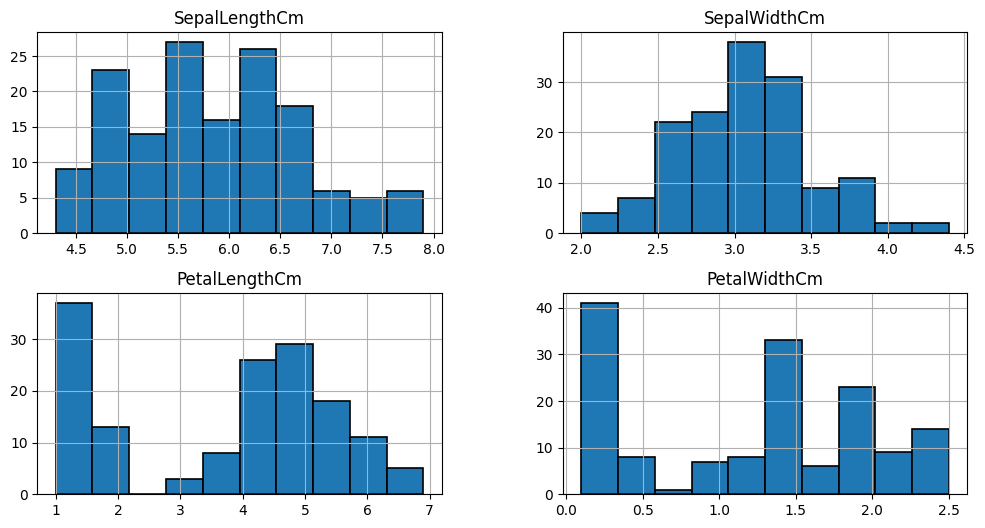

In [43]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [44]:
#开始从sklearn中导入一个个的分类模型，包括逻辑回归模型，分离向量机模型，决策树模型。导入几个工具，包括训练集和测试集分开的工具，预测工具，
#以及预测评估工具
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [45]:
iris.shape

(150, 5)

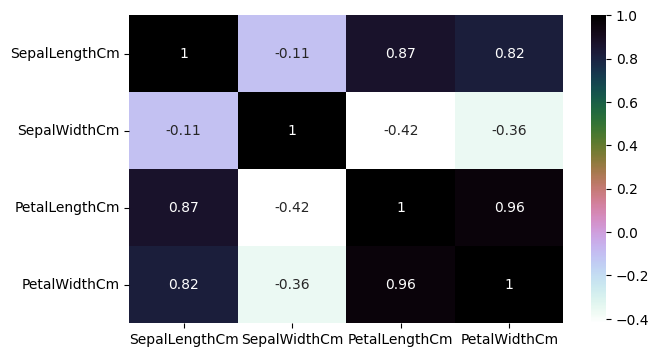

In [46]:
plt.figure(figsize=(7,4)) 
#DataFrame数据，访问其多个列名，必须是一个[[list]]，而不是[list]
numeric_iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
sns.heatmap(numeric_iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [47]:
train,test = train_test_split(iris,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [48]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [49]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
143,6.8,3.2,5.9,2.3
26,5.0,3.4,1.6,0.4


In [50]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
66,5.6,3.0,4.5,1.5


In [51]:
train_y.head()

143     Iris-virginica
26         Iris-setosa
19         Iris-setosa
94     Iris-versicolor
38         Iris-setosa
Name: Species, dtype: object

In [52]:
#向量机算法的模型预测
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("the accuracy of the SVM is:",metrics.accuracy_score(prediction,test_y))

the accuracy of the SVM is: 1.0


In [53]:
#逻辑回归
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [54]:
#决策树
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [55]:
#k邻近算法
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of KNeighborsClassfier is:",metrics.accuracy_score(prediction,test_y))

The accuracy of KNeighborsClassfier is: 1.0


([<matplotlib.axis.XTick at 0x2a561b8dd10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

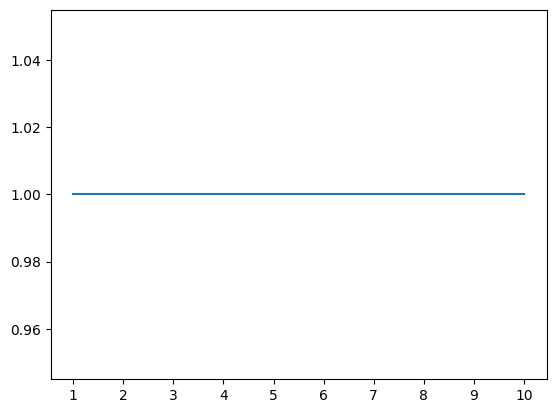

In [56]:
#有关于K邻近要选多少个点才合适的
a_index = list(range(1,11))
accuracy = []
x=[1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    accur = metrics.accuracy_score(prediction,test_y)
    accuracy.append(accur)
plt.plot(a_index,accuracy)
plt.xticks(x)


In [57]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [58]:
train_p,test_p = train_test_split(petal,test_size = 0.3,random_state=0)#设置random_state=0是为了让随机种子固定，便于后继复现
train_x_p = train_p[['PetalLengthCm','PetalWidthCm']]
train_y_p = train_p.Species
test_x_p = test_p[['PetalLengthCm','PetalWidthCm']]
test_y_p = test_p.Species

train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s = train_s[['SepalLengthCm','SepalWidthCm']]
train_y_s = train_s.Species
test_x_s = test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s = test_s.Species


In [64]:
model = svm.SVC()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print("SVM using Petals is:",metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print("SVM using Sepal is:",metrics.accuracy_score(prediction,test_y_s))

SVM using Petals is: 0.9777777777777777
SVM using Sepal is: 0.8


In [65]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [66]:
model = DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print("the accuracy of DecisionTree  using Petal is:",metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print("the accuracy of DecisionTree using Spetal is:",metrics.accuracy_score(prediction,test_y_s))

the accuracy of DecisionTree  using Petal is: 0.9555555555555556
the accuracy of DecisionTree using Spetal is: 0.6666666666666666


In [67]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


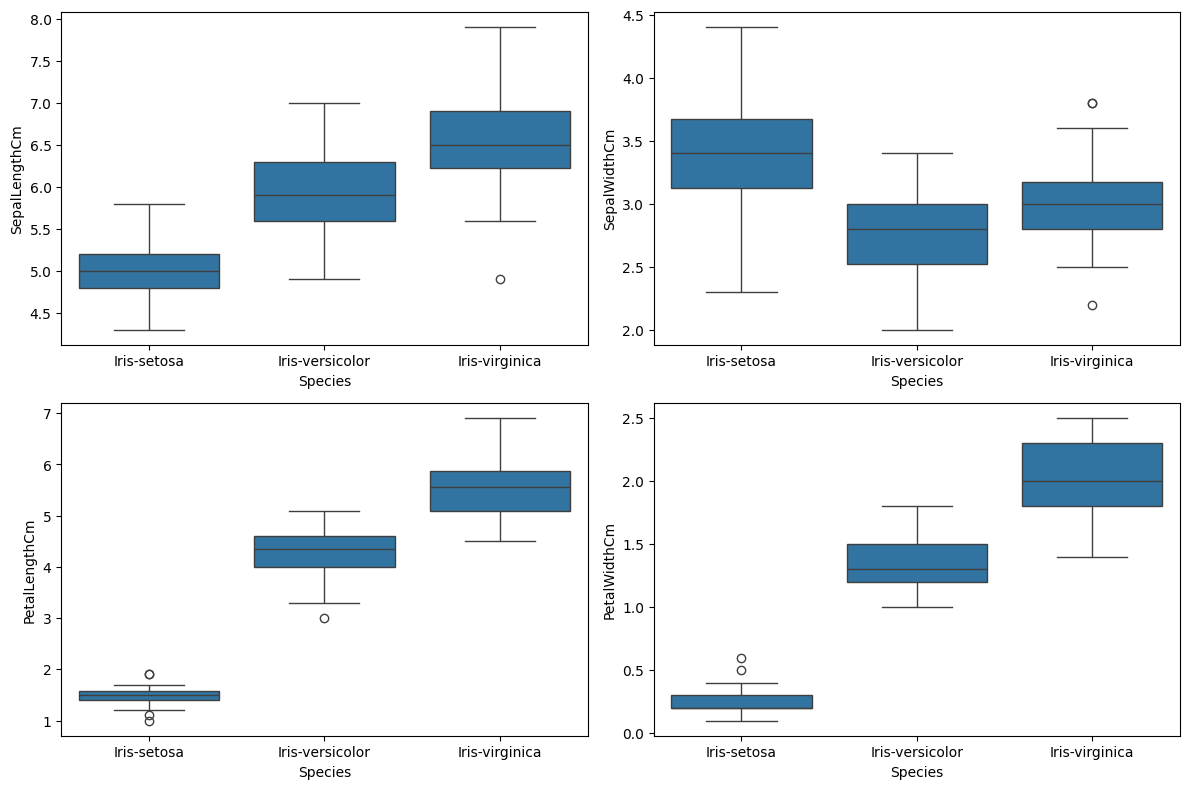

In [68]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
plt.tight_layout()
plt.show()